In [1]:
import os
os.chdir('../../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

FATTY_ACID_PATT = MolFromSmarts("C-C-C-C(-[OH])=O")


def is_fatty_acid(mol):
    if mol.HasSubstructMatch(FATTY_ACID_PATT):
        atom_types = [a.GetSymbol() for a in mol.GetAtoms()]
        uq, counts = np.unique(atom_types, return_counts=True)
        if ["C", "O"] == uq.tolist() and counts[1] == 2:
            return True
        return False

RDKit WARNING: [11:10:22] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molexplain.utils import DATA_PATH

In [3]:
with open(os.path.join(DATA_PATH, "ppb", "data_ppb.pt"), "rb") as handle:
    inchis, values = pickle.load(handle)

from tqdm import tqdm

fatty_acids = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if is_fatty_acid(MolFromInchi(inchi)):
        fatty_acids.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

 38%|███▊      | 1753/4634 [00:01<00:01, 1827.90it/s]RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
 45%|████▌     | 2105/4634 [00:01<00:01, 1585.92it/s]RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
 49%|████▉     | 2267/4634 [00:01<00:01, 1546.53it/s]RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:10:24] WARNING: not removing hydrogen atom without neighbors
 52%|█████▏    | 2424/4634 [00:01<00:01, 

In [4]:
from molexplain.vis_baseline import molecule_importance_diff
from molexplain.utils import BASELINE_MODELS_PATH

Using backend: pytorch


In [5]:
from joblib import load

model = load(os.path.join(BASELINE_MODELS_PATH, "rf_ppb.pt"))

/home/jose/anaconda3/envs/molexplain/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/jose/anaconda3/envs/molexplain/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


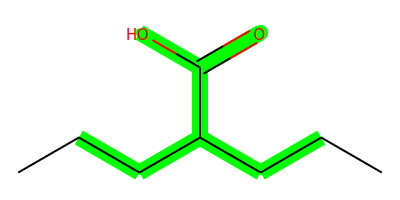

In [6]:
mol = MolFromInchi(fatty_acids[0])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    addHs=False)
img

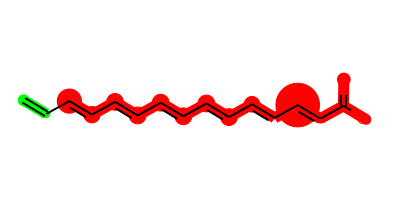

In [7]:
mol = MolFromInchi('InChI=1S/C15H16O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15(16)17/h2-14H,1H2,(H,16,17)/b4-3+,6-5+,8-7+,10-9+,12-11+,14-13+')
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.05,
                                    addHs=False)
img

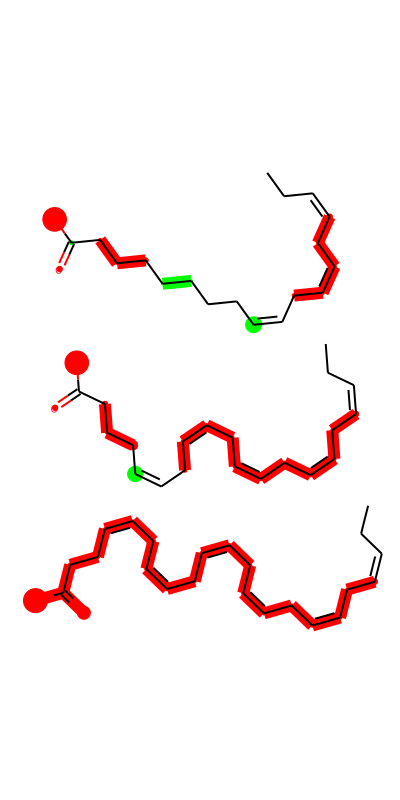

In [8]:
mol = MolFromInchi('InChI=1S/C22H32O2.C20H30O2.C18H30O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22(23)24;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20(21)22;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20/h3-4,6-7,9-10,12-13,15-16,18-19H,2,5,8,11,14,17,20-21H2,1H3,(H,23,24);3-4,6-7,9-10,12-13,15-16H,2,5,8,11,14,17-19H2,1H3,(H,21,22);3-4,6-7,9-10H,2,5,8,11-17H2,1H3,(H,19,20)/b4-3-,7-6-,10-9-,13-12-,16-15-,19-18-;4-3-,7-6-,10-9-,13-12-,16-15-;4-3-,7-6-,10-9-')
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.05,
                                    addHs=False,
                                    img_height=800)
img

In [9]:
PATTERN = MolFromSmarts("[#8]-[#6](=O)"+"~[#6]" * 5 +"(-[#8])=O")


def contains_pharm(mol):
    if mol.HasSubstructMatch(PATTERN):
        return True
    return False

In [10]:
filtered = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if contains_pharm(MolFromInchi(inchi)):
        filtered.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

100%|██████████| 4634/4634 [00:03<00:00, 1412.31it/s]


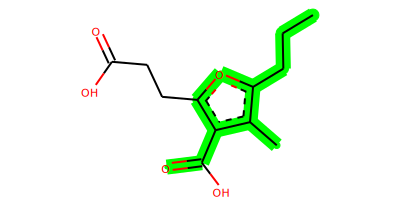

In [13]:
mol = MolFromInchi(filtered[0])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=5,
                                    addHs=False)
img

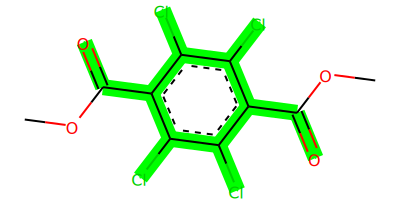

In [15]:
mol = MolFromInchi(filtered[1])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=1,
                                    addHs=False)
img

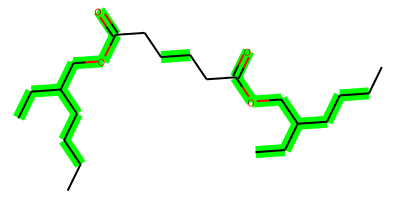

In [20]:
mol = MolFromInchi(filtered[2])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=0.5,
                                    addHs=False)
img

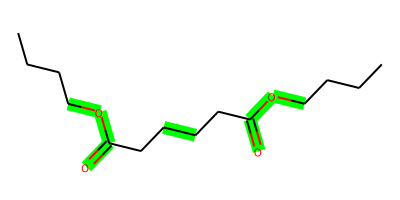

In [21]:
mol = MolFromInchi(filtered[3])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=0.5,
                                    addHs=False)
img

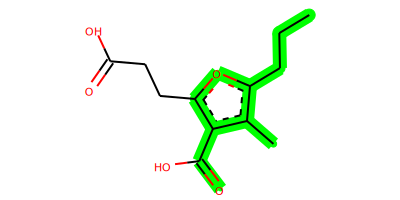

In [22]:
mol = MolFromInchi(filtered[4])
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=5,
                                    addHs=False)
img

In [24]:
# THESE ARE THE ONES SHOWN IN THE PAPER
# https://www.sciencedirect.com/science/article/pii/S0006295202010742?via%3Dihub

from molexplain.clean_data import IUPAC_REST
import requests

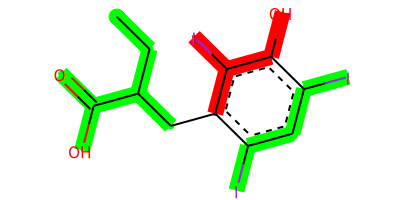

In [25]:
from rdkit.Chem import MolFromSmiles #nope
mol = MolFromSmiles("CCC(CC1=C(I)C(O)=C(I)C=C1I)C(O)=O")
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    addHs=False)
img

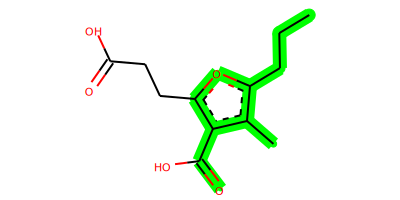

In [26]:
inchi = requests.get(IUPAC_REST.format("3-carboxy-4-methyl-5-propyl-2-furanpropionicacid")).content.decode("utf8") #nope
mol = MolFromInchi(inchi)
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=5,
                                    addHs=False)
img

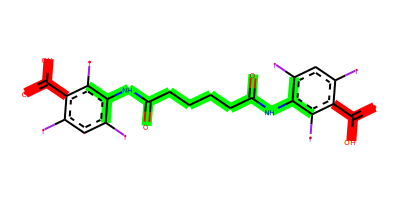

In [30]:
inchi = requests.get(IUPAC_REST.format("iodipamide")).content.decode("utf8")  # nope
mol = MolFromInchi(inchi)
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    addHs=False)
img

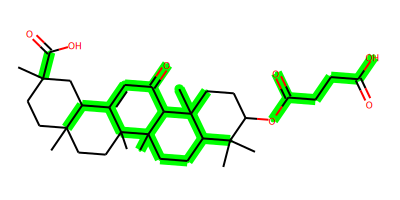

In [27]:
inchi = requests.get(IUPAC_REST.format("carbenoxolone")).content.decode("utf8")  # nope
mol = MolFromInchi(inchi)
svg, img, _,  = molecule_importance_diff(mol,
                                    model,
                                    vis_factor=0.01,
                                    eps=5,
                                    addHs=False)
img